In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df=pd.read_csv('mcc_mock_assessment_dataset.csv')

In [173]:
df.head()

,Candidate_ID,Age,Gender,Country_of_Med_School,Language_Proficiency_Score,Exam_Score,Exam_Attempts,Prep_Course_Attended,Pass_Status
0,1,30,Other,Iran,54,451.3,1,Yes,Fail
1,2,43,Male,China,78,633.4,3,Yes,Fail
2,3,38,Male,India,86,598.2,1,No,Pass
3,4,34,Other,India,87,533.1,1,No,Fail
4,5,31,Female,UK,68,498.5,1,Yes,Fail


In [175]:
data=df.drop('Candidate_ID', axis=1)

In [177]:
data.head()

,Age,Gender,Country_of_Med_School,Language_Proficiency_Score,Exam_Score,Exam_Attempts,Prep_Course_Attended,Pass_Status
0,30,Other,Iran,54,451.3,1,Yes,Fail
1,43,Male,China,78,633.4,3,Yes,Fail
2,38,Male,India,86,598.2,1,No,Pass
3,34,Other,India,87,533.1,1,No,Fail
4,31,Female,UK,68,498.5,1,Yes,Fail


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         200 non-null    int64  
 1   Gender                      200 non-null    object 
 2   Country_of_Med_School       200 non-null    object 
 3   Language_Proficiency_Score  200 non-null    int64  
 4   Exam_Score                  200 non-null    float64
 5   Exam_Attempts               200 non-null    int64  
 6   Prep_Course_Attended        200 non-null    object 
 7   Pass_Status                 200 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 12.6+ KB


In [181]:
data.describe()

,Age,Language_Proficiency_Score,Exam_Score,Exam_Attempts
count,200.000000,200.000000,200.00000,200.000000
mean,33.360000,74.340000,499.52950,1.995000
std,6.116984,14.561752,103.31382,0.817506
min,24.000000,50.000000,225.90000,1.000000
25%,28.000000,62.000000,437.85000,1.000000
50%,33.000000,75.500000,498.95000,2.000000
75%,38.000000,86.000000,570.05000,3.000000
max,44.000000,99.000000,778.40000,3.000000


In [183]:
print(data['Gender'].unique())
print(data['Country_of_Med_School'].unique())
print(data['Prep_Course_Attended'].unique())

['Other' 'Male' 'Female']
['Iran' 'China' 'India' 'UK' 'Others' 'Canada']
['Yes' 'No']


In [185]:
data.isnull().sum()

Age                           0
Gender                        0
Country_of_Med_School         0
Language_Proficiency_Score    0
Exam_Score                    0
Exam_Attempts                 0
Prep_Course_Attended          0
Pass_Status                   0
dtype: int64

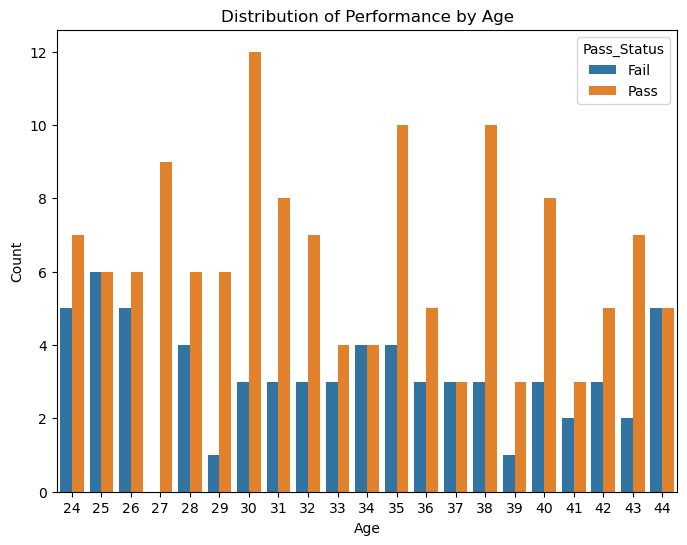

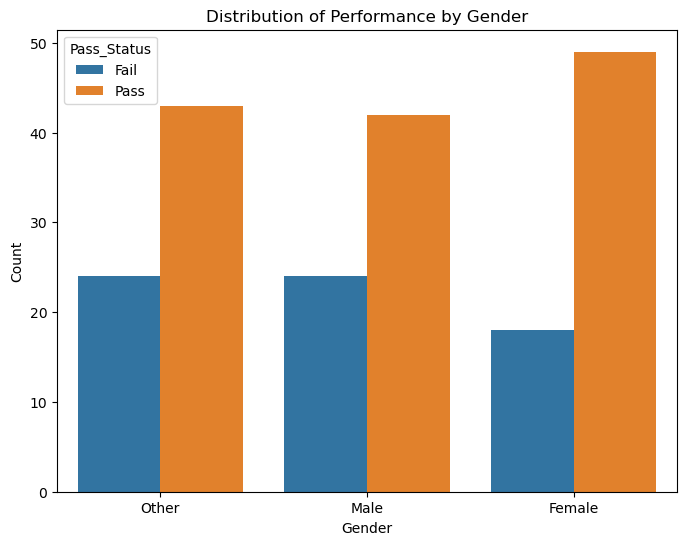

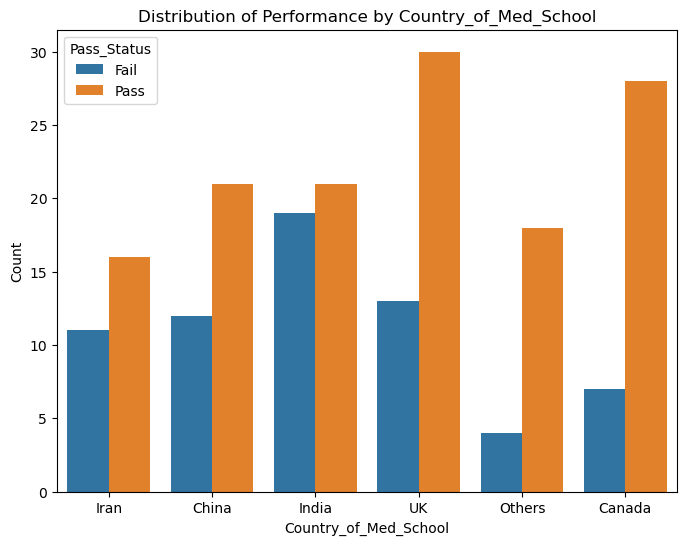

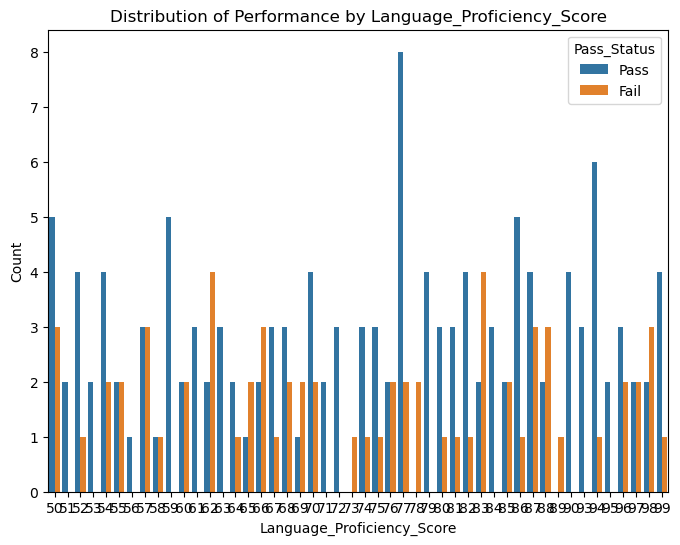

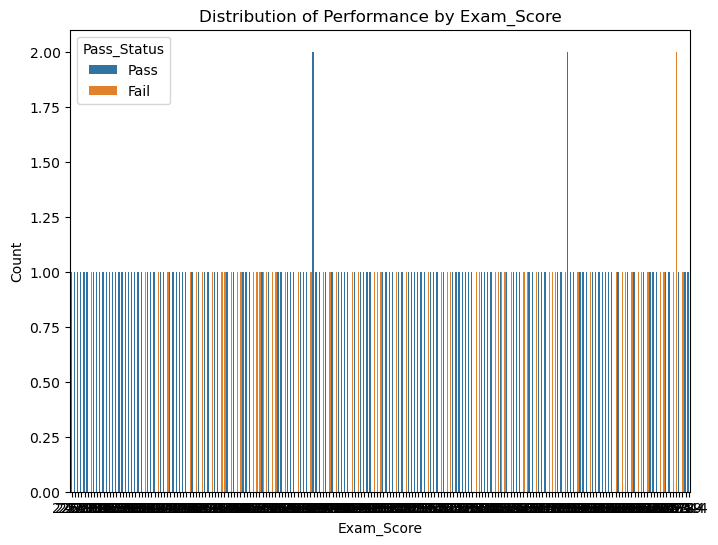

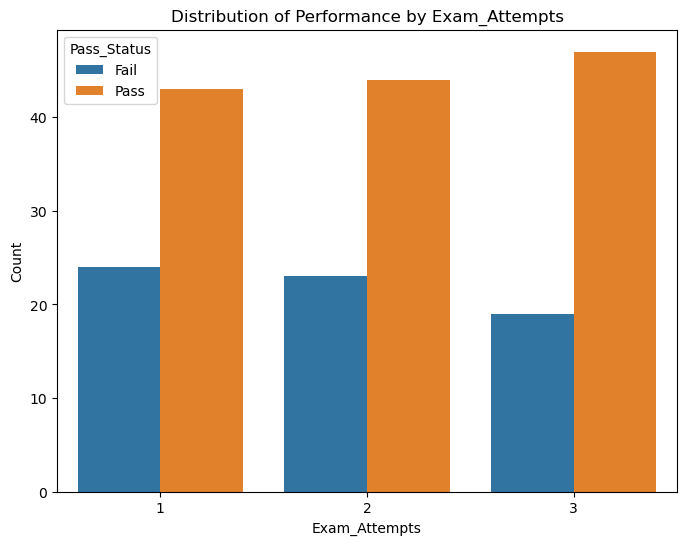

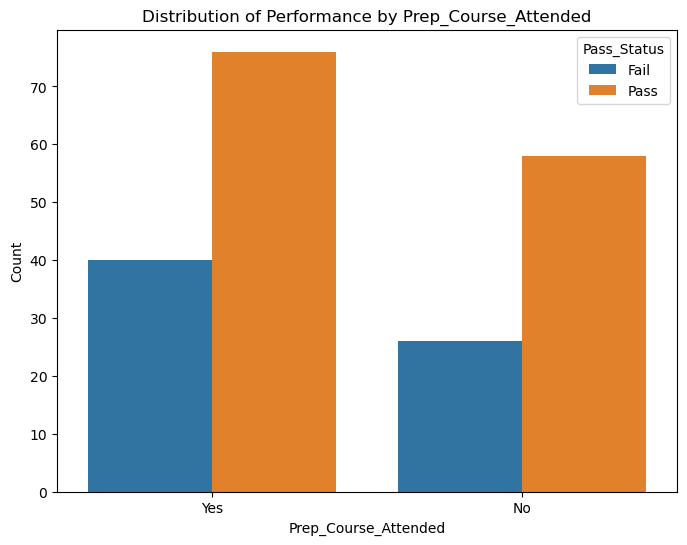

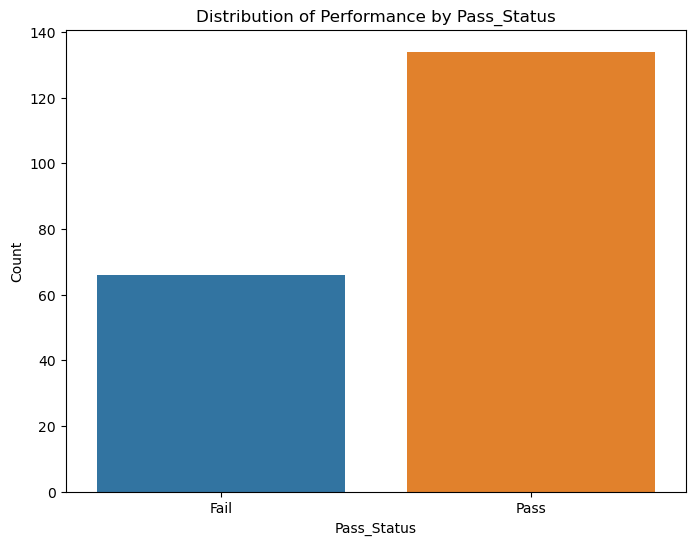

In [187]:
for col in data.columns:
    
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Pass_Status', data=data)
    plt.title(f'Distribution of Performance by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

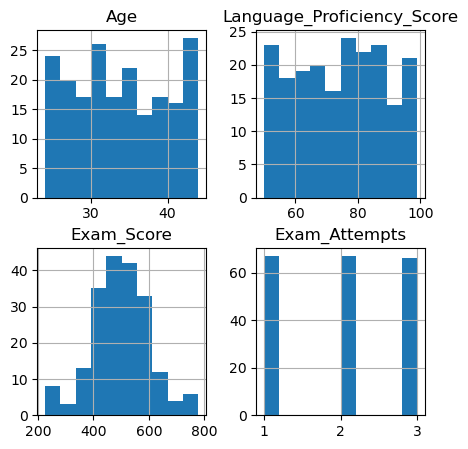

In [189]:
#histogram for each  feature
data.hist(bins=10,figsize=(5,5))
plt.show()

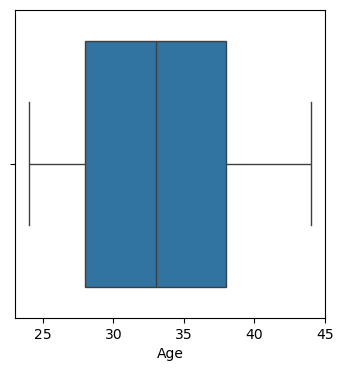

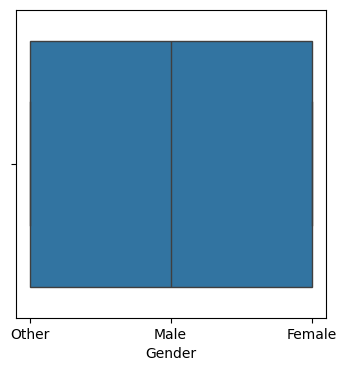

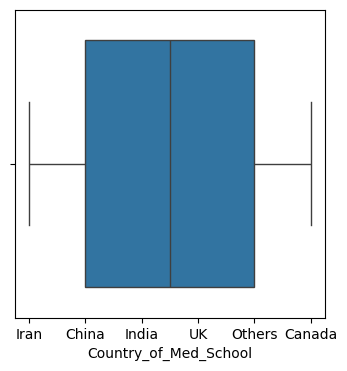

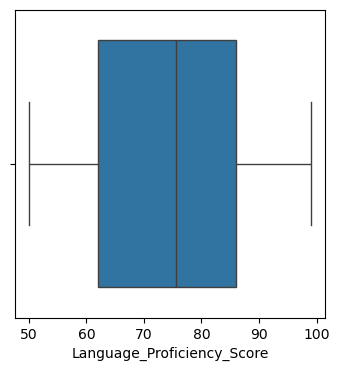

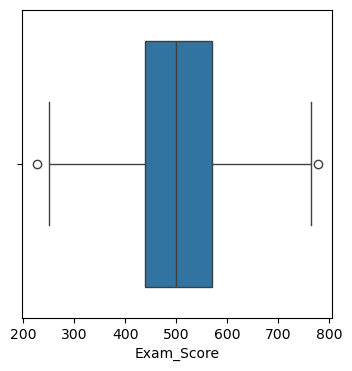

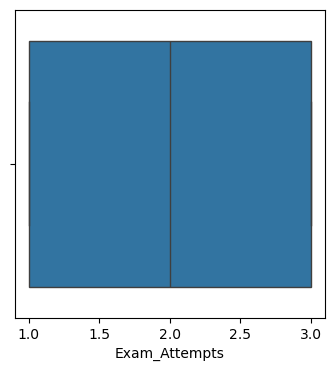

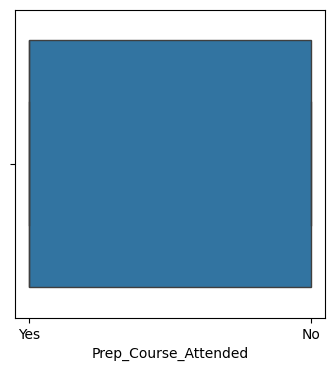

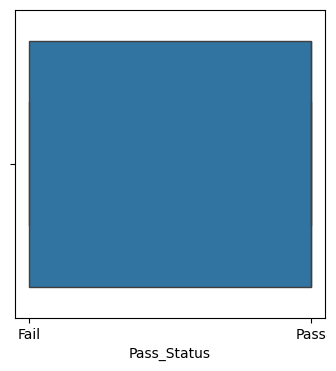

In [231]:
for col in data.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=col, data=data)
    plt.show()

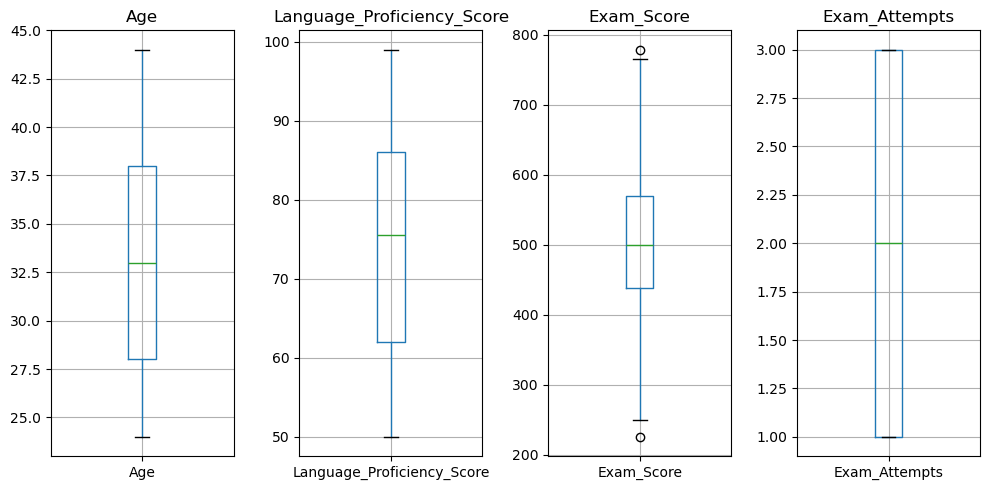

In [247]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))
axes = axes.flatten()

# Plot boxplot for each numeric column
for i, col in enumerate(numeric_data.columns):
    numeric_data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)


plt.tight_layout()
plt.show()

<Axes: xlabel='Exam_Attempts', ylabel='count'>

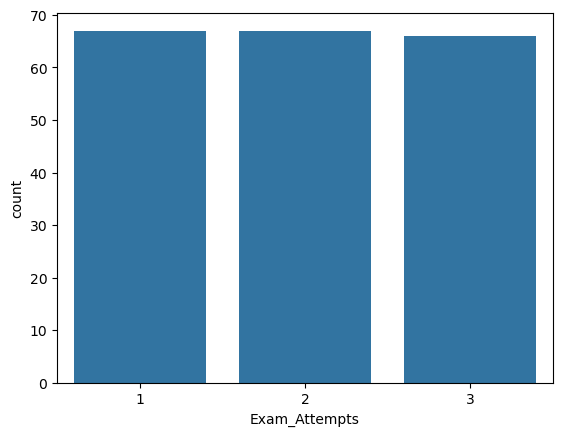

In [195]:
sns.countplot(x="Exam_Attempts", data=data)

In [213]:
data_new=data.drop('Exam_Attempts', axis=1)

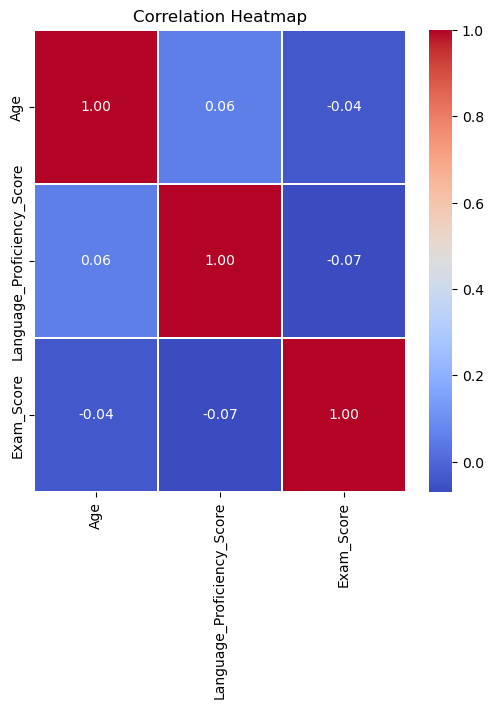

In [199]:
correlation_matrix = data[['Age','Language_Proficiency_Score','Exam_Score']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.3, linecolor="white", fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [201]:
print(data[data['Age']== 0].shape[0])
print(data[data['Language_Proficiency_Score']== 0].shape[0])
print(data[data['Exam_Score']== 0].shape[0])

0
0
0


In [215]:
data_new['Pass_Status']

0      Fail
1      Fail
2      Pass
3      Fail
4      Fail
       ... 
195    Pass
196    Pass
197    Fail
198    Fail
199    Fail
Name: Pass_Status, Length: 200, dtype: object

In [217]:
data_new['Pass_Status'].replace({'Fail': 0,'Pass': 1 },inplace=True)


C:\Users\mitra\AppData\Local\Temp\ipykernel_29564\3603471775.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_new['Pass_Status'].replace({'Fail': 0,'Pass': 1 },inplace=True)


In [219]:
data_new['Pass_Status']

0      0
1      0
2      1
3      0
4      0
      ..
195    1
196    1
197    0
198    0
199    0
Name: Pass_Status, Length: 200, dtype: int64

In [221]:
# One-hot encoding
data_feature1 = data.drop('Pass_Status',axis=1)
data_encoded = pd.get_dummies(data_feature1)
data_encoded = data_encoded.astype(int)

In [225]:
data_encoded.head()

,Age,Language_Proficiency_Score,Exam_Score,Exam_Attempts,Gender_Female,Gender_Male,Gender_Other,Country_of_Med_School_Canada,Country_of_Med_School_China,Country_of_Med_School_India,Country_of_Med_School_Iran,Country_of_Med_School_Others,Country_of_Med_School_UK,Prep_Course_Attended_No,Prep_Course_Attended_Yes
0,30,54,451,1,0,0,1,0,0,0,1,0,0,0,1
1,43,78,633,3,0,1,0,0,1,0,0,0,0,0,1
2,38,86,598,1,0,1,0,0,0,1,0,0,0,1,0
3,34,87,533,1,0,0,1,0,0,1,0,0,0,1,0
4,31,68,498,1,1,0,0,0,0,0,0,0,1,0,1


In [227]:
# Handling potential outliers and rescale the data appropriately
# We use Quantile Transformer : This method transforms the features to follow a uniform or a normal distribution.
# Therefore, for a given feature, this transformation tends to spread out the most frequent values. 
# It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

from sklearn.preprocessing import QuantileTransformer
x=data_encoded
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =data_encoded.columns
df_new.head()

C:\Users\mitra\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (200). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\mitra\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Age,Language_Proficiency_Score,Exam_Score,Exam_Attempts,Gender_Female,Gender_Male,Gender_Other,Country_of_Med_School_Canada,Country_of_Med_School_China,Country_of_Med_School_India,Country_of_Med_School_Iran,Country_of_Med_School_Others,Country_of_Med_School_UK,Prep_Course_Attended_No,Prep_Course_Attended_Yes
0,0.339196,0.097990,0.304020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.929648,0.572864,0.914573,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.733668,0.748744,0.854271,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.540201,0.778894,0.653266,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.407035,0.371859,0.497487,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [160]:
print(df_new['Country_of_Med_School_Iran'].sum())
print(df_new['Country_of_Med_School_Canada'].sum())

27.0
35.0


In [296]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [298]:
X=data_encoded
y=data_new['Pass_Status']

In [300]:

# X = features, y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [302]:
# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [304]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({1: 109, 0: 51})
After SMOTE: Counter({0: 109, 1: 109})


K-Nearest Neighbours

We implement hyperparameter tuning for a K-Nearest Neighbors (KNN) classifier using grid search with cross-validation. It searches over a range of hyperparameters including the number of neighbors (n_neighbors), the distance metric (metric), the type of distance calculation (p), and the weighting scheme for neighbors (weights). The model is evaluated on a test set using classification metrics such as precision, recall, and F1-score. Overall, this approach aims to find the optimal configuration for the KNN model to maximize its predictive performance.


In [307]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(1,20))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [311]:
# Fit the model
best_model = grid_search.fit(X_resampled, y_resampled)

In [313]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 1


In [315]:
# knn model with k = 3
KNN = KNeighborsClassifier(n_neighbors=3)

In [317]:
#Predict testing set
knn_pred = best_model.best_estimator_.predict(X_test)

In [319]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.41      0.47      0.44        15
           1       0.65      0.60      0.62        25

    accuracy                           0.55        40
   macro avg       0.53      0.53      0.53        40
weighted avg       0.56      0.55      0.55        40



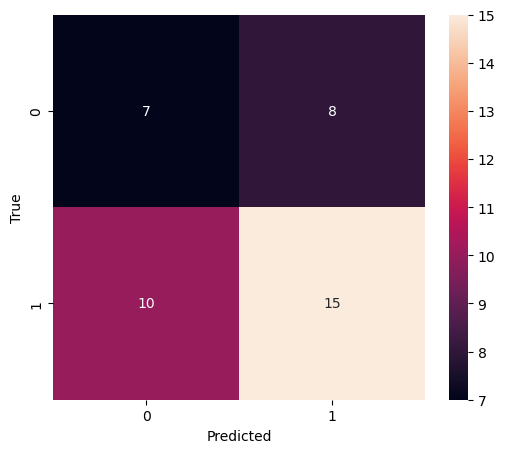

In [323]:
import tensorflow as tf

cm_knn = tf.math.confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [259]:
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)


C:\Users\mitra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [261]:
y_pred = model.predict(X_test)

In [263]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.13      0.17        15
           1       0.58      0.72      0.64        25

    accuracy                           0.50        40
   macro avg       0.40      0.43      0.40        40
weighted avg       0.45      0.50      0.46        40



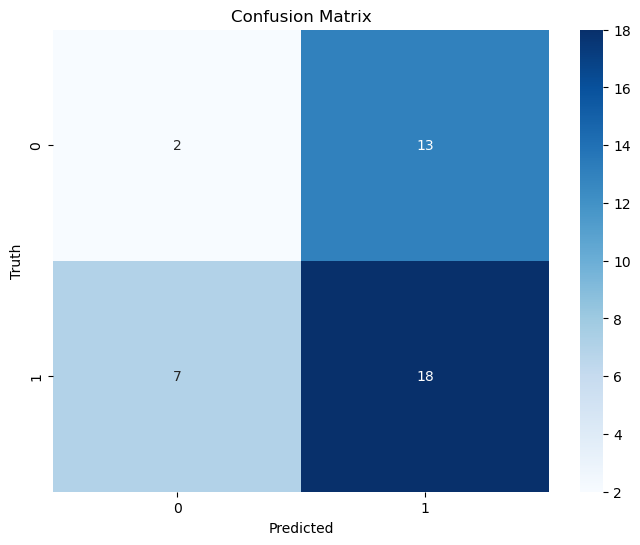

In [265]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [279]:
model=SVC()
model.fit(X_resampled, y_resampled)

SVC()

In [281]:
predict=model.predict(X_test)

In [283]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.35      0.53      0.42        15
           1       0.59      0.40      0.48        25

    accuracy                           0.45        40
   macro avg       0.47      0.47      0.45        40
weighted avg       0.50      0.45      0.46        40



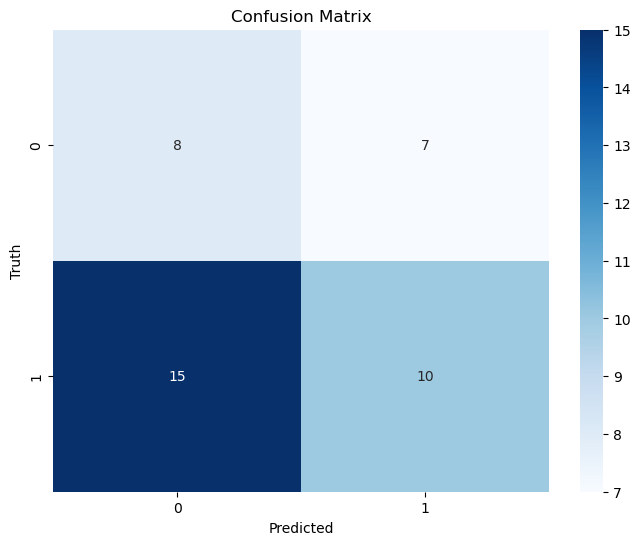

In [285]:
cm=confusion_matrix(y_test, predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [333]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44        15
           1       0.68      0.76      0.72        25

    accuracy                           0.62        40
   macro avg       0.59      0.58      0.58        40
weighted avg       0.61      0.62      0.61        40



In [325]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_resampled, y_resampled, cv=5)


array([0.52272727, 0.59090909, 0.54545455, 0.53488372, 0.55813953])

In [327]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [329]:
predict=model.predict(X_test)

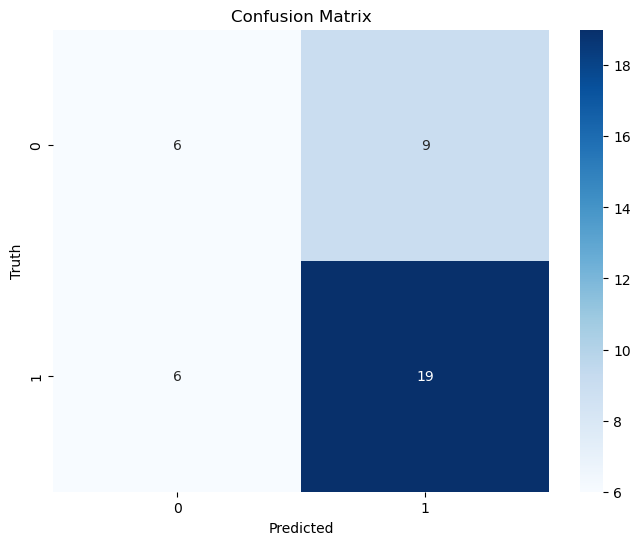

In [331]:
cm=confusion_matrix(y_test, predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [275]:
# ----- STEP 1: Create summary table -----
summary_df = df.describe(include='all')

In [62]:
# ----- STEP 2: Create a correlation matrix -----
# Only include numeric columns
corr_df = df.corr(numeric_only=True, method='pearson')

In [64]:
# ----- STEP 3: Write to Excel -----
with pd.ExcelWriter("mcc_output.xlsx") as writer:
    summary_df.to_excel(writer, sheet_name="Summary")
    corr_df.to_excel(writer, sheet_name="Correlations")